# Quick Draw GAN

A Generative Adversarial Network trained of the Google Quickdraw dataset found here: https://github.com/googlecreativelab/quickdraw-dataset#preprocessed-dataset

Created in tf.keras

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow.keras as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation,Reshape
from tensorflow.keras.layers import BatchNormalization, Conv2D,Flatten, Conv2DTranspose, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,TensorBoard
from time import time

## Helper Functions

In [3]:
from helpers import get_np,imshow,get_callbacks

## Load the Data

In [4]:
inp_path = 'full_numpy_bitmap_apple.npy'
data = get_np(inp_path)
img_w,img_h = data.shape[1:3]

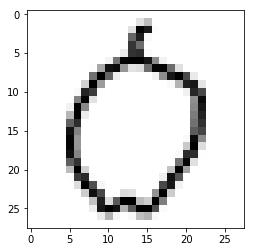

In [5]:
imshow(data,1040)

In [6]:
data.shape

(144722, 28, 28, 1)

# Generator

In [7]:
def generator_builder(z_dims = 100,depth = 64,p = 0.4):
    #inputs
    inputs = Input((z_dims,))
    
    #Dense
    dense1 = Dense(7*7*64)(inputs)
    dense1 = BatchNormalization(momentum=0.9)(dense1)
    dense1 = Activation('relu')(dense1)
    
    #Reshape to (7,7,64) tensor
    reshaper = Reshape((7,7,64))(dense1)
    reshaper = BatchNormalization()(reshaper)
    reshaper = Dropout(p)(reshaper)
    
    #Deconvoliutions
    deconv1 = UpSampling2D()(reshaper)
    deconv1 = Conv2DTranspose(int(depth/2),kernel_size=5,padding='same')(deconv1)
    deconv1 = BatchNormalization(momentum=0.9)(deconv1)
    deconv1 = Activation('relu')(deconv1)
    
    deconv2 = UpSampling2D()(deconv1)
    deconv2 = Conv2DTranspose(int(depth/4),kernel_size=5,padding='same')(deconv2)
    deconv2 = BatchNormalization(momentum=0.9)(deconv2)
    deconv2 = Activation('relu')(deconv2)
    
    deconv3 = Conv2DTranspose(int(depth/8),kernel_size=5,padding='same')(deconv2)
    deconv3 = BatchNormalization(momentum=0.9)(deconv3)
    deconv3 = Activation('relu')(deconv3)
    
    #Output
    output = Conv2D(1,kernel_size=5,padding='same',activation='sigmoid')(deconv3)
    model = Model(inputs,output)
    model.summary()
    return model

In [8]:
generator = generator_builder()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 3136)              316736    
_________________________________________________________________
batch_normalization_v1 (Batc (None, 3136)              12544     
_________________________________________________________________
activation (Activation)      (None, 3136)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_v